In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Exploration

In [ ]:
# Muat data
df = pd.read_csv('/content/drive/MyDrive/Dataset/Gold_Price_Cleaned.csv')

In [ ]:
# Melihat data
print("--- Data Head ---")
df.head()

--- Data Head ---


,Date,Price_IDR,Open_IDR,High_IDR,Low_IDR,Volume_IDR,Year,Month,Day,Price_Change
0,2014-01-01,5651089,5630621,5661801,5612449,560480,2014,1,1,NaN
1,2014-01-02,5733918,5677105,5748264,5677105,600651,2014,1,2,82829.0
2,2014-01-03,5686478,5744630,5762611,5650515,583434,2014,1,3,-47440.0
3,2014-01-04,5600780,5600780,5600780,5600780,0,2014,1,4,-85698.0
4,2014-01-06,5570174,5604797,5622970,5557166,4663650,2014,1,6,-30606.0


In [ ]:
# Melihat info data
print("\n--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2848 non-null   object 
 1   Price_IDR     2848 non-null   int64  
 2   Open_IDR      2848 non-null   int64  
 3   High_IDR      2848 non-null   int64  
 4   Low_IDR       2848 non-null   int64  
 5   Volume_IDR    2848 non-null   int64  
 6   Year          2848 non-null   int64  
 7   Month         2848 non-null   int64  
 8   Day           2848 non-null   int64  
 9   Price_Change  2847 non-null   float64
dtypes: float64(1), int64(8), object(1)
memory usage: 222.6+ KB


In [ ]:
# Melihat statistik dari data
print("\n--- Data Description ---")
df.describe()


--- Data Description ---


,Price_IDR,Open_IDR,High_IDR,Low_IDR,Volume_IDR,Year,Month,Day,Price_Change
count,2.848000e+03,2.848000e+03,2.848000e+03,2.848000e+03,2.848000e+03,2848.000000,2848.000000,2848.000000,2847.000000
mean,7.885316e+06,7.885555e+06,7.927675e+06,7.843295e+06,2.408840e+06,2018.982093,6.510183,15.707514,3198.715490
std,2.749698e+06,2.749819e+06,2.764370e+06,2.735564e+06,2.035996e+06,3.178900,3.446602,8.792726,69073.728368
min,4.695213e+06,4.702482e+06,4.712429e+06,4.680866e+06,0.000000e+00,2014.000000,1.000000,1.000000,-763821.000000
25%,5.579690e+06,5.576869e+06,5.603745e+06,5.547793e+06,1.206562e+06,2016.000000,4.000000,8.000000,-26780.500000
50%,6.492192e+06,6.493339e+06,6.547761e+06,6.454698e+06,2.071671e+06,2019.000000,7.000000,16.000000,2869.000000
75%,9.722123e+06,9.721166e+06,9.769372e+06,9.669901e+06,3.151024e+06,2022.000000,9.000000,23.000000,34624.000000
max,1.516107e+07,1.516241e+07,1.530301e+07,1.509049e+07,2.045273e+07,2025.000000,12.000000,31.000000,288465.000000


## Feature Selection & Data Preparation

In [ ]:
# Mengisi nilai null pada kolom price change pada row pertama
df.loc[0, 'Price_Change'] = 0

In [ ]:
# Memilih fitur yang akan digunakan untuk melatih model, pada kasus ini kolom yang digunakan adalah yang berkenaan terhadap harganya saja
# dan kolom yang berkenaan dengan tanggal di-drop karena model yang digunakan bukanlah time series
features = df.drop(columns=['Price_IDR','Date', 'Year', 'Month', 'Day']).columns
target = 'Price_IDR'

X = df[features]
y = df[target]

In [ ]:
# Split data menjadi training dan testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 2278 samples
Testing set size: 570 samples


## Model Training

In [ ]:
# Buat model
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("\n--- Model Coefficients ---")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
print(f"\nModel Intercept: {model.intercept_}")


--- Model Coefficients ---
              Coefficient
Open_IDR         0.126350
High_IDR         0.373218
Low_IDR          0.500584
Volume_IDR       0.001805
Price_Change     0.436398

Model Intercept: -1679.8203543238342


## Model Evaluation

In [ ]:
# Buat prediksi pada data testing
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Performa model pada data test ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")


--- Performa model pada data test ---
Mean Squared Error (MSE): 683868942.62
Root Mean Squared Error (RMSE): 26150.89
Mean Absolute Error (MAE): 16928.39
R-squared (R²): 0.9997


## Visualisasi Hasil

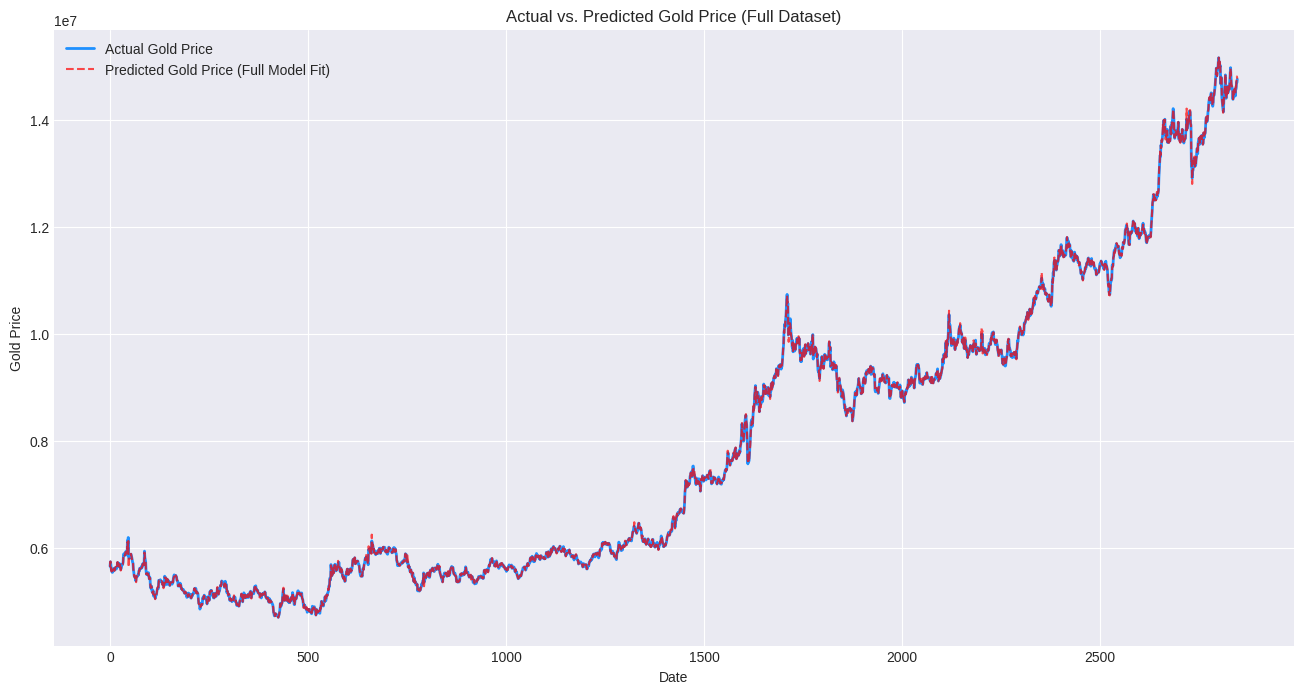

In [ ]:
df['Predicted_Gold_Price'] = model.predict(X)

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(16, 8))

plt.plot(df.index, df['Price_IDR'], label='Actual Gold Price', color='dodgerblue', linewidth=2)

plt.plot(df.index, df['Predicted_Gold_Price'], label='Predicted Gold Price (Full Model Fit)', color=(255/255, 0/255, 0/255, 0.7), linestyle='--')

plt.title('Actual vs. Predicted Gold Price (Full Dataset)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()

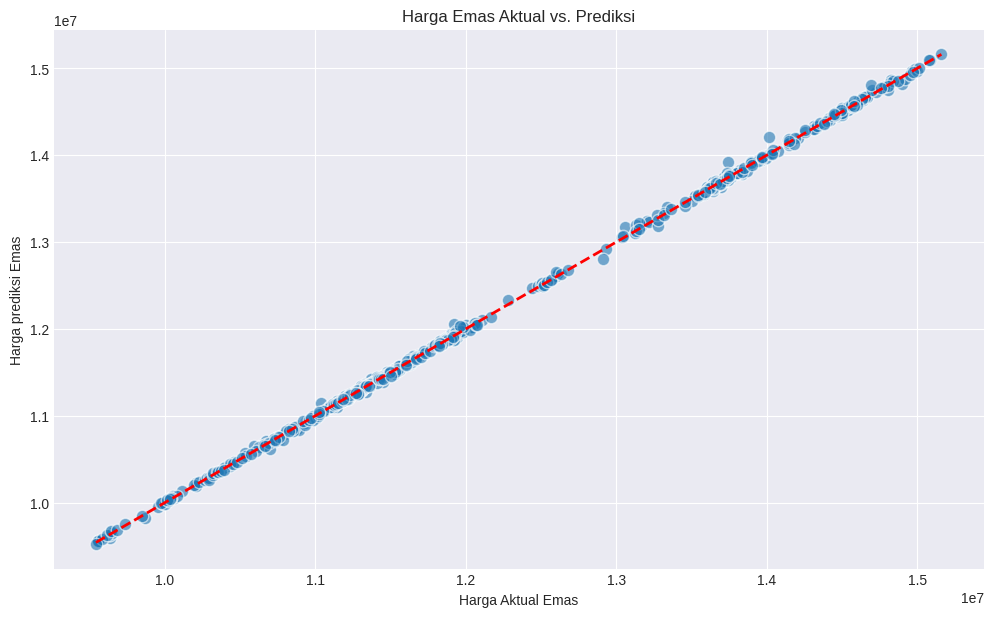

In [ ]:
# Membuat scatter plot untuk membandingkan nilai aktual vs prediksi
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 7))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Harga Aktual Emas")
plt.ylabel("Harga prediksi Emas")
plt.title("Harga Emas Aktual vs. Prediksi")
plt.show()